# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

### Feature description

- manufacturer - name of the car manufacturer
- model - name of the car model
- year - the year when the car was produced
- mileage - the number of miles the car has traveled since production
- engine - car engine
- transmission - type of the car's transmission
- drivetrain - type of the car's drivetrain
- fuel_type - type of fuel that the car consumes
- mpg - the number of miles a car can travel using one gallon of fuel (miles per gallon)
- exterior_color - car exterior color
- interior_color - car interior color
- accidents_or_damage - whether the car was involved in accidents
- one_owner - whether the car was owned by one person
- personal_use_only - whether the car was used only for personal purposes
- seller_name - name of the seller
- seller_rating - seller's rating
- driver_rating - car rating given by drivers
- driver_reviews_num - the number of car reviews left by drivers
- price_drop - price reduction from the initial price
- price - car price

In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
import seaborn as sns

In [2]:
# read in cars data with only the values of manufacturer == 'Volvo'

cars = pd.read_csv(os.path.join("..", "data", "input", "cars.csv")).query("manufacturer == 'Volvo'").reset_index()

In [3]:
def clean_data(df):
    # Chain operations to reduce DataFrame access
    df = (df
          .dropna(thresh=len(df) * 0.9, axis=1)  # drop columns with more than 10% missing values
          .assign(
              drivetrain=lambda df: df['drivetrain'].str.lower().str.replace('-', ' ').replace({
                  'awd': 'all wheel drive', 
                  'fwd': 'front wheel drive', 
                  'rwd': 'rear wheel drive', 
                  'four wheel drive': 'all wheel drive'
              }),  # clean drivetrain column
              model_short=lambda df: df['model'].str[:4].str.strip(' '),  # create and clean model_short column
              fuel_type=lambda df: df['fuel_type'].str.lower().replace({
                  'gas': 'gasoline', 
                  'g': 'gasoline', 
                  'gasoline fuel': 'gasoline', 
                  'premium unleaded': 'gasoline', 
                  'regular unleaded': 'gasoline',
                  'gasoline/mild electric hybrid': 'hybrid', 
                  'plug-in hybrid': 'hybrid', 
                  'plug-in electric/gas': 'electric', 
                  'hybrid fuel': 'hybrid'
              })  # clean fuel_type column
          )
    )
    return df

In [46]:
cars = clean_data(cars)
cars.isna().sum()

index                    0
manufacturer             0
model                    0
year                     0
mileage                  3
engine                  46
transmission            63
drivetrain             226
fuel_type               17
exterior_color         183
accidents_or_damage    617
one_owner              703
personal_use_only      620
seller_name            102
driver_rating          561
driver_reviews_num       0
price                    0
model_short              0
dtype: int64

In [5]:
cars.columns

Index(['index', 'manufacturer', 'model', 'year', 'mileage', 'engine',
       'transmission', 'drivetrain', 'fuel_type', 'exterior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'driver_rating', 'driver_reviews_num', 'price', 'model_short'],
      dtype='object')

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

year: numerical, continuous data
fuel_type: categorical, not ordinal
seller_rating: categorical, ordinal

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [6]:
# Verify if one_owner column is determinant for new or used cars
cars.groupby('one_owner')['mileage'].median()

one_owner
0.0    60526.5
1.0    27143.0
Name: mileage, dtype: float64

##### one_owner determinant for new or used cars?

A value of 0 or 1 for one_owner does not appear to refer to whether the car is new or used as mileage for both 0 and 1 values are significantly larger than a new car's expected mileage.

Further exploration suggests the following: 

If a used car listing doesn't specify "one owner", it usually means that the car has had multiple owners throughout its lifespan. This could be for various reasons, such as resale, trade-ins, or multiple transfers of ownership. 

This explanation would clarify why one_owner == 0 has higher median mileage compared to one_owner == 1

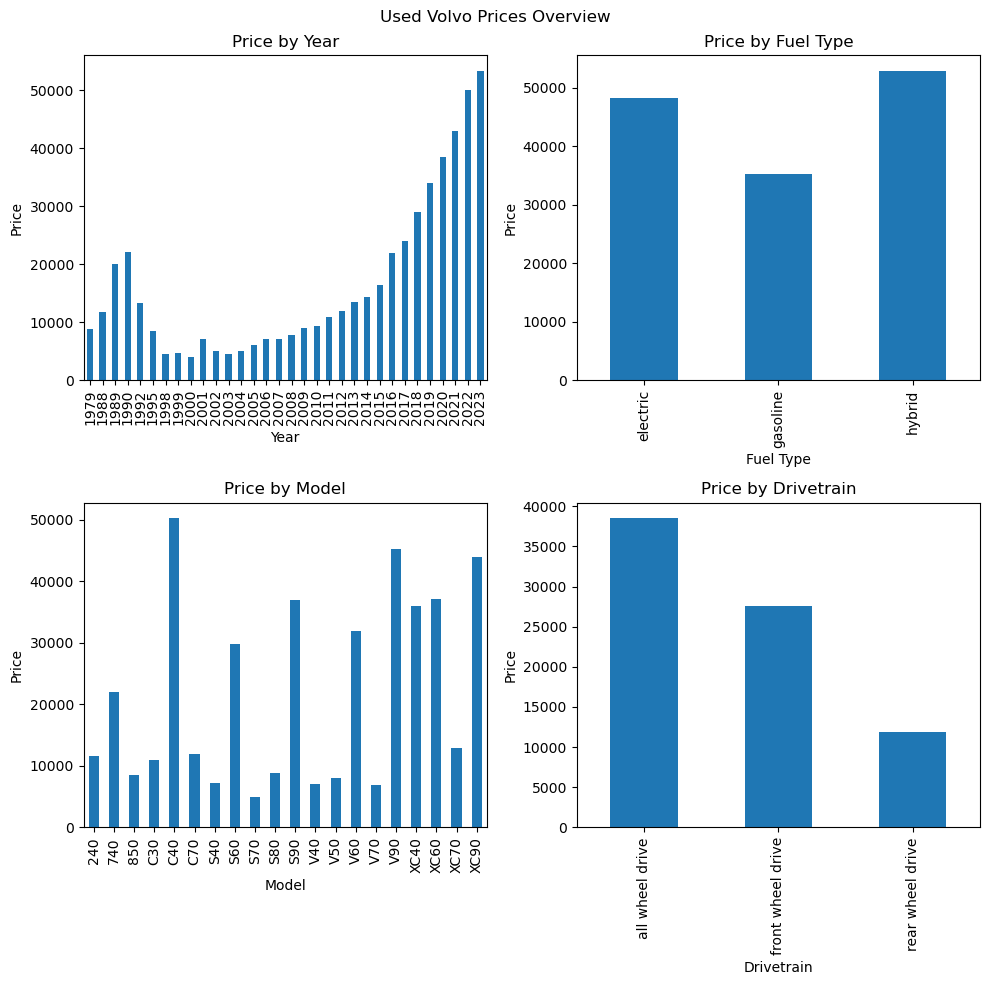

In [47]:
# figure with subplots for manufacturer volvo with price compared to mileage, fueltype, transmission and driver rating

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Used Volvo Prices Overview')
cars.groupby('year')['price'].median().plot(kind = 'bar', ax = axs[0, 0])
cars.groupby('fuel_type')['price'].median().plot(kind='bar', ax = axs[0, 1])
cars.groupby('model_short')['price'].median().plot(kind='bar', ax = axs[1, 0])
cars.groupby('drivetrain')['price'].median().plot(kind='bar', ax = axs[1, 1])

axs[0, 0].set(xlabel='Year', ylabel='Price', title = 'Price by Year')
axs[0, 1].set(xlabel='Fuel Type', ylabel='Price', title = 'Price by Fuel Type')
axs[1, 0].set(xlabel='Model', ylabel='Price', title = 'Price by Model')
axs[1, 1].set(xlabel='Drivetrain', ylabel='Price', title = 'Price by Drivetrain')

plt.tight_layout()
plt.show()

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

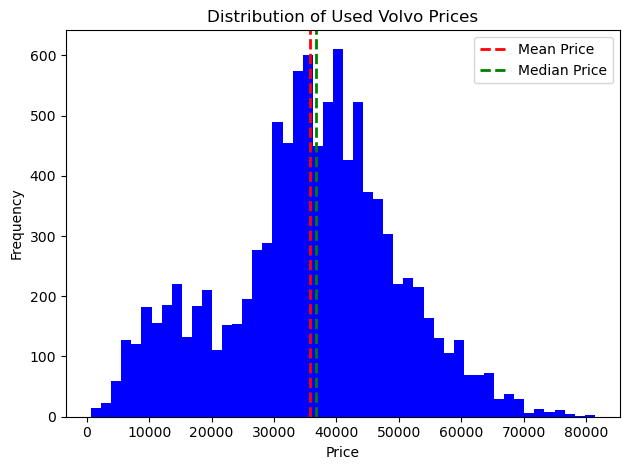

In [9]:
fig, ax = plt.subplots()

ax.hist(cars['price'], bins=50, color='blue')
ax.axvline(cars['price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Price')
ax.axvline(cars['price'].median(), color='green', linestyle='--', linewidth=2, label='Median Price')
ax.legend()
ax.set_title('Distribution of Used Volvo Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

plt.tight_layout()

In [10]:
print(f'Volvo median price: {int(cars["price"].median())}')
print(f'Volvo mean price: {int(cars["price"].mean())}')
print(f'Standard deviation of Volvo prices: {int(cars["price"].std())}')

Volvo median price: 36673
Volvo mean price: 35799
Standard deviation of Volvo prices: 13951


d:\Anaconda\envs\jouk_is_geweldig\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\jouk_is_geweldig\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


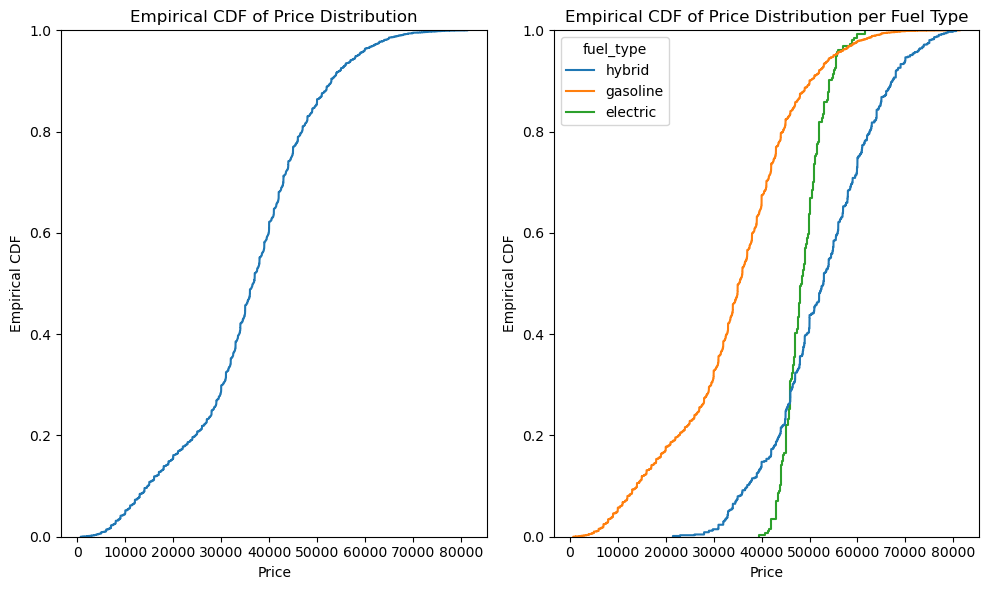

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,6))

# Plot the ECDF
sns.ecdfplot(data = cars, x = 'price', ax = ax[0])
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Empirical CDF')
ax[0].set_title('Empirical CDF of Price Distribution')

sns.ecdfplot(data = cars, x = 'price', hue = 'fuel_type', ax = ax[1])
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Empirical CDF')
ax[1].set_title('Empirical CDF of Price Distribution per Fuel Type')

plt.tight_layout();

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

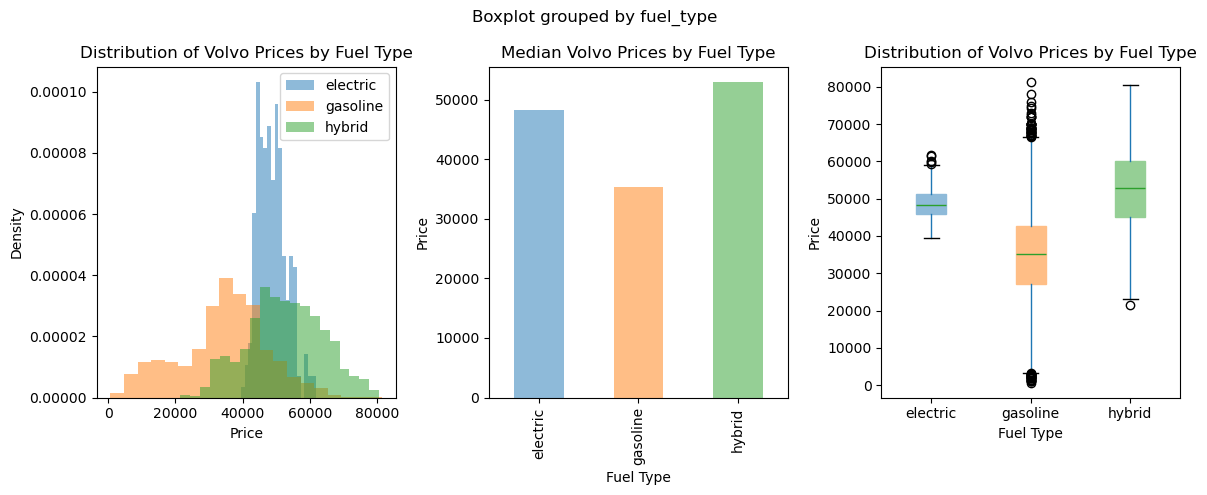

In [48]:
# histogram of price for different fuel types

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Create histogram
cars.groupby('fuel_type')['price'].plot(kind='hist', bins=20, alpha=0.5, ax=ax[0], density = True)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Volvo Prices by Fuel Type')
ax[0].legend()

# Create bar plot
cars.groupby('fuel_type')['price'].median().plot(kind='bar', color=['#8EBAD9','#FFBE86','#95CF95'], ax=ax[1])
ax[1].set_xlabel('Fuel Type')
ax[1].set_ylabel('Price')
ax[1].set_title('Median Volvo Prices by Fuel Type')

# Create box plot

boxplot = cars.boxplot(column='price', by='fuel_type', ax=ax[2], patch_artist=True)
colors = ['#8EBAD9', '#FFBE86', '#95CF95']  # Colors for the boxes

# Get the boxes in the boxplot
boxes = [patch for patch in boxplot.get_children() if isinstance(patch, matplotlib.patches.PathPatch)]

for patch, color in zip(boxes, colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    
ax[2].set_xlabel('Fuel Type')
ax[2].set_ylabel('Price')
ax[2].set_title('Distribution of Volvo Prices by Fuel Type')
ax[2].grid(False)


plt.tight_layout()
plt.show()

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - **De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.**
      - **Niet waar**, de hoogte van de rechthoekige box, een indicator voor spreiding, is kleiner bij elektische wagens dan bij benzinewagens. Dit suggereert dat de spreiding van prijs voor benzinewagens groter is dan voor elektrische wagens

 - **Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.**
     - Op basis van de boxplots is dit **niet te besluiten** omdat 50000 in de interquantiel afstand ligt van zowel elektrische als benzinewagens.
     - Als we de dataset zouden gebruiken mbt tot Volvo's om dit te berekenen, dan is de kans op benzine gegeven een prijs van meer dan 50000 groter dan de kans op een elektrische wagen. Dit is omdat er veel meer datapunten zijn voor benzinewagens dan voor elektrische wagens in onze dataset

 - **Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.**
     - Dit is **waar** omdat de mediaan van prijs voor elektrische wagens dichter bij 50000 ligt dan de mediaan van prijs voor benzinewagens.
     - Dit klopt in de dataset mbt tot Volvo's

In [13]:
# spread of price for electric, gasoline and hybrid cars
gas_std = int(cars.query("fuel_type == 'gasoline'")["price"].std())
ele_std = int(cars.query("fuel_type == 'electric'")["price"].std())
hyb_std = int(cars.query("fuel_type == 'hybrid'")["price"].std())
print(f'Standard deviation of gasoline: {gas_std}')
print(f'Standard deviation of electric: {ele_std}')
print(f'Standard deviation of hybrid: {hyb_std}')

Standard deviation of gasoline: 13279
Standard deviation of electric: 4163
Standard deviation of hybrid: 11170


In [49]:
total_cars_at_50k = cars[cars['price'] >= 50000].shape[0]
electric_cars_at_50k = cars[(cars['price'] >= 50000) & (cars['fuel_type'] == 'electric')].shape[0]

probability_ele = electric_cars_at_50k / total_cars_at_50k

print(f"The probability of a car being electric given its price is 50000 is {probability_ele:.2f}")

gasoline_cars_at_50k = cars[(cars['price'] >= 50000) & (cars['fuel_type'] == 'gasoline')].shape[0]

probability_gas = gasoline_cars_at_50k / total_cars_at_50k

print(f"The probability of a car being fuel type gasoline given its price is 50000 is {probability_gas:.2f}")

The probability of a car being electric given its price is 50000 is 0.06
The probability of a car being fuel type gasoline given its price is 50000 is 0.66


In [50]:
total_electric_cars = cars[cars['fuel_type'] == 'electric'].shape[0]
electric_cars_above_50k = cars[(cars['price'] > 50000) & (cars['fuel_type'] == 'electric')].shape[0]

probability_elec = electric_cars_above_50k / total_electric_cars

print(f"The probability of the price of an electric car being more than 50000 is {probability_elec:.2f}")

total_gasoline_cars = cars[cars['fuel_type'] == 'gasoline'].shape[0]
gasoline_cars_above_50k = cars[(cars['price'] > 50000) & (cars['fuel_type'] == 'gasoline')].shape[0]

probability_gaso = gasoline_cars_above_50k / total_gasoline_cars

print(f"The probability of the price of a gasoline car being more than 50000 is {probability_gaso:.2f}")

The probability of the price of an electric car being more than 50000 is 0.33
The probability of the price of a gasoline car being more than 50000 is 0.10


### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

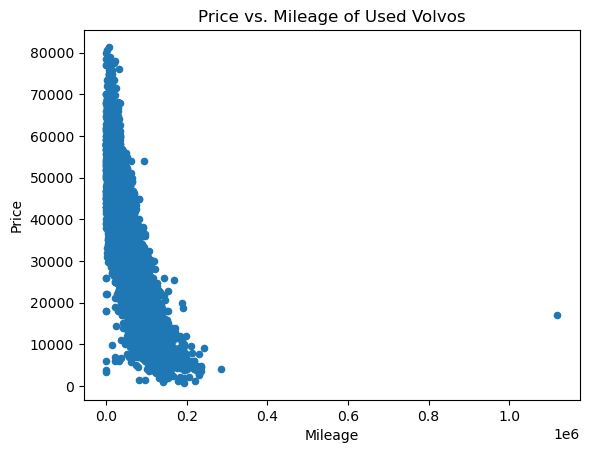

In [51]:
fig, ax = plt.subplots()

cars.plot(kind='scatter', x='mileage', y='price', ax=ax)

ax.set_title('Price vs. Mileage of Used Volvos')
ax.set_xlabel('Mileage')
ax.set_ylabel('Price');

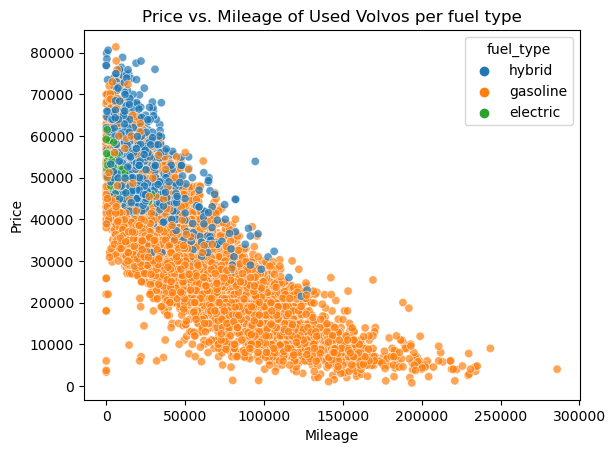

In [52]:
# Price vs. Mileage of Used Volvos per fuel type, excluding the volvo with mileage over 1 000 000
fig, ax = plt.subplots()

sns.scatterplot(x='mileage', y='price', alpha = 0.7, hue='fuel_type', data=cars.query('mileage < 1000000'), ax = ax)

plt.title('Price vs. Mileage of Used Volvos per fuel type')
plt.xlabel('Mileage')
plt.ylabel('Price');

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

d:\Anaconda\envs\jouk_is_geweldig\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


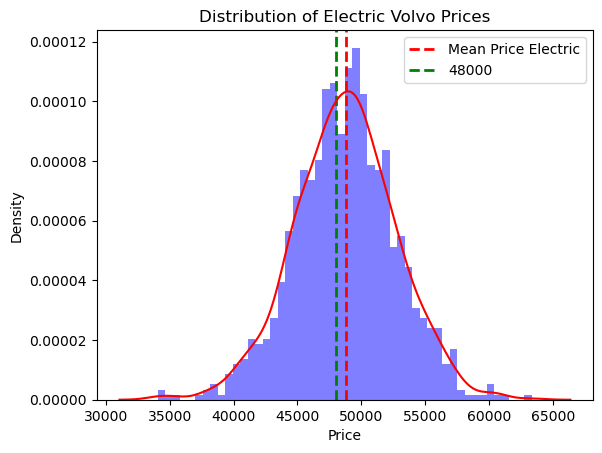

In [37]:

volvo_ele_dist = np.random.normal(cars.query('fuel_type == "electric"')['price'].mean(), (cars.query('fuel_type == "electric"')['price'].std()), 1000)

fig, ax = plt.subplots()
ax.hist(volvo_ele_dist, bins=50, color='blue', alpha=0.5, density=True)
ax.axvline(cars.query('fuel_type == "electric"')['price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Price Electric')
ax.axvline(48000, color='green', linestyle='--', linewidth=2, label='48000')
sns.kdeplot(volvo_ele_dist, color='red', ax = ax)
ax.set_xlabel('Price')
ax.set_title('Distribution of Electric Volvo Prices')
ax.legend()
plt.show()